# Homework 4

In [3]:
import pandas as pd
import numpy as np
import math
from sklearn import linear_model

In [4]:
sales = pd.read_csv('./kc_house_data.csv', dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
train_data = pd.read_csv('./wk3_kc_house_train_data.csv', dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
valid_data = pd.read_csv('./wk3_kc_house_valid_data.csv', dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
test_data = pd.read_csv('./wk3_kc_house_test_data.csv', dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})

set1_data = pd.read_csv('./wk3_kc_house_set_1_data.csv', dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
set2_data = pd.read_csv('./wk3_kc_house_set_2_data.csv', dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
set3_data = pd.read_csv('./wk3_kc_house_set_3_data.csv', dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
set4_data = pd.read_csv('./wk3_kc_house_set_4_data.csv', dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})

In [5]:
sales = sales.sort(['sqft_living','price'])

/Users/shute/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [7]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = poly_dataframe['power_1'].apply(lambda x: x**power)
    return poly_dataframe

In [8]:
l2_small_penalty = 1.5e-5

In [9]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data, sales['price'])

Ridge(alpha=1.5e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [10]:
model.coef_

array([  1.24873306e+02,  -4.77376011e-02,   3.01446238e-05,
        -2.44419942e-09,  -1.94153675e-13,   8.54085686e-18,
         1.51142121e-21,   8.27979094e-26,   6.52603100e-31,
        -3.27895017e-34,  -3.87962315e-38,  -2.72437650e-42,
        -1.07790800e-46,   3.78242694e-51,   1.39790296e-54])

In [89]:
# small and large
# l2_small_penalty=1.23e2
l2_small_penalty = 1e-9

In [90]:
poly15_data_1 = polynomial_dataframe(set1_data['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model1 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model1.fit(poly15_data_1, set1_data['price'])
model1.coef_

array([  5.44669396e+02,  -3.55447602e-01,   1.22446379e-04,
        -1.17175302e-08,  -3.90512838e-13,  -1.39075560e-17,
         1.47860210e-20,   6.87492484e-25,  -7.57204220e-29,
        -1.04097319e-32,  -3.71843982e-37,   3.39989366e-41,
         5.56591972e-45,   2.53761343e-49,  -3.35152888e-53])

In [91]:
poly15_data_2 = polynomial_dataframe(set2_data['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model2 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model2.fit(poly15_data_2, set2_data['price'])
model2.coef_

array([  8.59362626e+02,  -8.18118237e-01,   4.28879948e-04,
        -9.12770495e-08,  -2.69604861e-12,   3.73980376e-15,
        -1.42711959e-19,  -6.30794659e-23,  -1.44559588e-27,
         7.44321255e-31,   9.25865782e-35,   3.28044243e-41,
        -1.29543518e-42,  -1.38781278e-46,   1.66546458e-50])

In [92]:
poly15_data_3 = polynomial_dataframe(set3_data['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model3 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model3.fit(poly15_data_3, set3_data['price'])
model3.coef_

array([ -7.55395870e+02,   9.75579421e-01,  -4.58945928e-04,
         7.77957831e-08,   7.15013991e-12,  -2.88602061e-15,
        -2.13677650e-20,   3.38085264e-23,   2.19178110e-27,
        -1.97067739e-31,  -4.15993103e-35,  -1.80196263e-39,
         3.19071162e-43,   5.08456965e-47,  -3.93304283e-51])

In [93]:
poly15_data_4 = polynomial_dataframe(set4_data['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model4 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model4.fit(poly15_data_4, set4_data['price'])
model4.coef_

array([  1.11944570e+03,  -9.83760199e-01,   3.38770903e-04,
         3.60377059e-08,  -4.37813929e-11,   5.77191475e-15,
         7.66795307e-19,  -9.49297130e-23,  -1.96030886e-26,
        -2.10884428e-32,   3.31005109e-34,   3.47733959e-38,
        -2.43039247e-42,  -8.79553498e-46,   6.44569809e-50])

In [82]:
train_valid_shuffled = pd.read_csv('./wk3_kc_house_train_valid_shuffled.csv', dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})

In [24]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in xrange(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print i, (start, end)

0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


In [ ]:
start = (n*i)/10
end = (n*(i+1))/10
train_valid_shuffled[start:end+1]

In [ ]:
train_valid_shuffled[0:start].append(train_valid_shuffled[end+1:n])

In [58]:
def k_fold_cross_validation(k, l2_penalty, data, output):
    n = len(data)
    RSS = []
    for i in xrange(k):
        start = (n*i)/k
        end = (n*(i+1))/k-1
        valid = data[start:end+1]
        output_valid = output[start:end+1]
        
        train = data[0:start].append(data[end+1:n])
        output_train = output[0:start].append(output[end+1:n])
        
        model = linear_model.Ridge(alpha=l2_penalty, normalize=True)
        model.fit(train, output_train)
        
        RSS.append(((output_valid - model.predict(valid))**2).sum())   
    return np.array(RSS).mean()

In [59]:
l2_penalty = np.logspace(3, 9, num=13)

In [60]:
l2_penalty

array([  1.00000000e+03,   3.16227766e+03,   1.00000000e+04,
         3.16227766e+04,   1.00000000e+05,   3.16227766e+05,
         1.00000000e+06,   3.16227766e+06,   1.00000000e+07,
         3.16227766e+07,   1.00000000e+08,   3.16227766e+08,
         1.00000000e+09])

In [61]:
shuffle = polynomial_dataframe(train_valid_shuffled['sqft_living'], 15)

In [62]:
output = train_valid_shuffled[['price']]

In [63]:
var = []
for power in range(1, 16):
    # first we'll give the column a name:
    name = 'power_' + str(power)
    var.append(name)

In [69]:
min_i = 0
minRSS = k_fold_cross_validation(10, l2_penalty[0], shuffle, output)
for i in range(1, len(l2_penalty)):

    RSS = k_fold_cross_validation(10, l2_penalty[i], shuffle, output)

    if minRSS > RSS:
        minRSS = RSS
        min_i = i
print min_i
print l2_penalty[min_i]
print minRSS


0
1000.0
2.64977361037e+14


In [71]:
train_best = polynomial_dataframe(train_data['sqft_living'], 15)
output_best = train_data[['price']]

In [72]:
model_best = linear_model.Ridge(alpha=l2_penalty[min_i], normalize=True)
model_best.fit(train_best, output_best)

Ridge(alpha=1000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [73]:
test_best = polynomial_dataframe(test_data['sqft_living'], 15)
test_output_best = test_data[['price']]

In [75]:
RSS_best = ((test_output_best - model_best.predict(test_best))**2).sum()

In [76]:
print RSS_best

price    2.837569e+14
dtype: float64


# Homework 4.2

*** The design of this part of homework is a failure. You will know why when you see the grade.

In [100]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1 # add a constant column to an SFrame
    # prepend variable 'constant' to the features list
    features = ['constant'] + features
    # select the columns of data_SFrame given by the ‘features’ list into the SFrame ‘features_sframe’
    # features_sframe = data_sframe[features]
    
    # this will convert the features_sframe into a numpy matrix with GraphLab Create >= 1.7!!
    features_matrix = data_sframe[features].as_matrix()
    # assign the column of data_sframe associated with the target to the variable ‘output_sarray’
    output_array = data_sframe[output].as_matrix()

    # this will convert the SArray into a numpy array:
    # output_array = output_sarray.to_numpy(output) # GraphLab Create>= 1.7!!
    return(features_matrix, output_array)

In [104]:
def predict_output(feature_matrix, weights):
    predictions = np.dot(feature_matrix, weights)
    return(predictions)

In [219]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    if feature_is_constant == True:
        derivative = 2*np.dot(feature, errors)
    else:
        derivative = 2*np.dot(feature, errors) + 2*l2_penalty*weight
    return derivative

In [220]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price')
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights)
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False)
print np.sum(errors*example_features[:,1])*2+20.
print ''

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True)
print np.sum(errors)*2

-5.6554166816e+13
-5.6554166816e+13

-22446749330.0
-22446749330.0


In [237]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations = 100):
    weights = np.array(initial_weights) # make sure it's a numpy array
        #while not reached maximum number of iterations:
    iternum = 0
    while iternum <= max_iterations:
        # compute the predictions using your predict_output() function
        predictions = predict_output(feature_matrix, weights)
        
        # compute the errors as predictions - output
        errors = predictions - output
        
        for i in xrange(len(weights)): # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            if i == 0:
                derivative = feature_derivative_ridge(errors, feature_matrix[:, 0], weights[0], l2_penalty, True)
            else:
                derivative = feature_derivative_ridge(errors, feature_matrix[:, i], weights[i], l2_penalty, False)
            #(Remember: when i=0, you are computing the derivative of the constant!)
            # subtract the step size times the derivative from the current weight  
            weights[i] -= step_size*derivative
        iternum += 1
    return weights


In [232]:
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

In [233]:
l2_penalty = 0.0
step_size = 1e-12
max_iterations = 1000
initial_weights = np.zeros(len(simple_features)+1)

In [238]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

In [239]:
# for this problem, there is somwthing wrong with the assignment chekcing 
simple_weights_0_penalty # low penalty

array([ -8.56953348e-02,   2.64788506e+02])

In [214]:
# for this problem, there is somwthing wrong with the assignment chekcing 
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, 1e11, max_iterations)
simple_weights_high_penalty # high penalty

array([  6.97602618,  89.30826329])

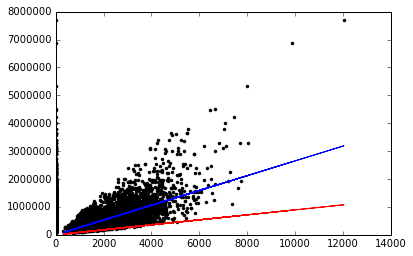

In [151]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

In [118]:
simple_feature_matrix

array([[  1.00000000e+00,   1.96000000e+03],
       [  1.00000000e+00,   5.42000000e+03],
       [  1.00000000e+00,   1.16000000e+03],
       ..., 
       [  1.00000000e+00,   3.51000000e+03],
       [  1.00000000e+00,   1.02000000e+03],
       [  1.00000000e+00,   1.02000000e+03]])

In [174]:
(feature_test, output_test) = get_numpy_data(test_data, simple_features, my_output)

In [178]:
RSS_1 = ((output_test - np.dot(feature_test, initial_weights)) ** 2).sum()
RSS_2 = ((output_test - np.dot(feature_test, simple_weights_0_penalty)) ** 2).sum()
RSS_3 = ((output_test - np.dot(feature_test, simple_weights_high_penalty)) ** 2).sum()

In [181]:
print RSS_1
print RSS_2
print RSS_3

9.27913649763e+14
1.43086951729e+14
4.85876990181e+14


In [182]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

In [185]:
initial_weights = np.zeros(len(model_features)+1)
step_size = 1e-12
max_iterations = 1000

In [186]:
l2_penalty = 0.0

In [187]:
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)
multiple_weights_0_penalty

array([ -2.22395096e-01,   2.46540124e+02,   2.03659493e+01])

In [189]:
l2_penalty = 1e11

In [190]:
multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)
multiple_weights_high_penalty

array([  5.33237928,  70.80524278,  61.6387588 ])

In [194]:
(feature_test, output_test) = get_numpy_data(test_data, model_features, my_output)

In [196]:
RSS_1 = ((output_test - np.dot(feature_test, initial_weights)) ** 2).sum()
RSS_2 = ((output_test - np.dot(feature_test, multiple_weights_0_penalty)) ** 2).sum()
RSS_3 = ((output_test - np.dot(feature_test, multiple_weights_high_penalty)) ** 2).sum()
print RSS_1
print RSS_2
print RSS_3

9.27913649763e+14
1.4275917287e+14
3.56770516371e+14


In [197]:
np.dot(feature_test, multiple_weights_0_penalty)

array([ 514635.23136316,  473935.09361444,  317435.83301303, ...,
        760682.08735059,  305698.3179561 ,  322956.12665483])

In [199]:
output_test - np.dot(feature_test, multiple_weights_0_penalty)

array([-191635.23136316,   56064.90638556, -128435.83301303, ...,
       -152182.08735059,  -75698.3179561 ,   91543.87334517])

In [198]:
np.dot(feature_test, multiple_weights_high_penalty)

array([ 281143.87478042,  211991.53378977,  150308.70805098, ...,
        377470.73690187,  155306.20730459,  160262.5742994 ])

In [200]:
output_test - np.dot(feature_test, multiple_weights_high_penalty)

array([  41856.12521958,  318008.46621023,   38691.29194902, ...,
        231029.26309813,   74693.79269541,  254237.4257006 ])